## DNN Example for Fashion MNIST Dataset

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [25]:
# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

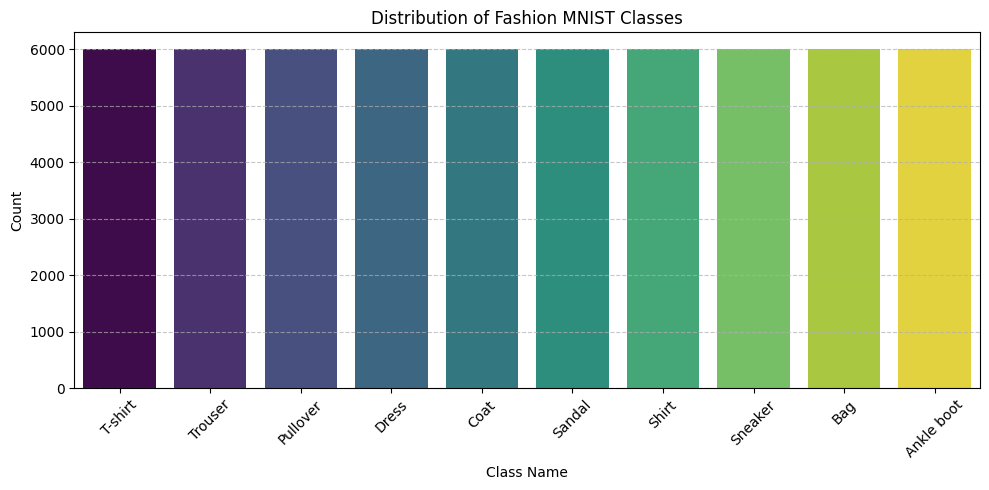

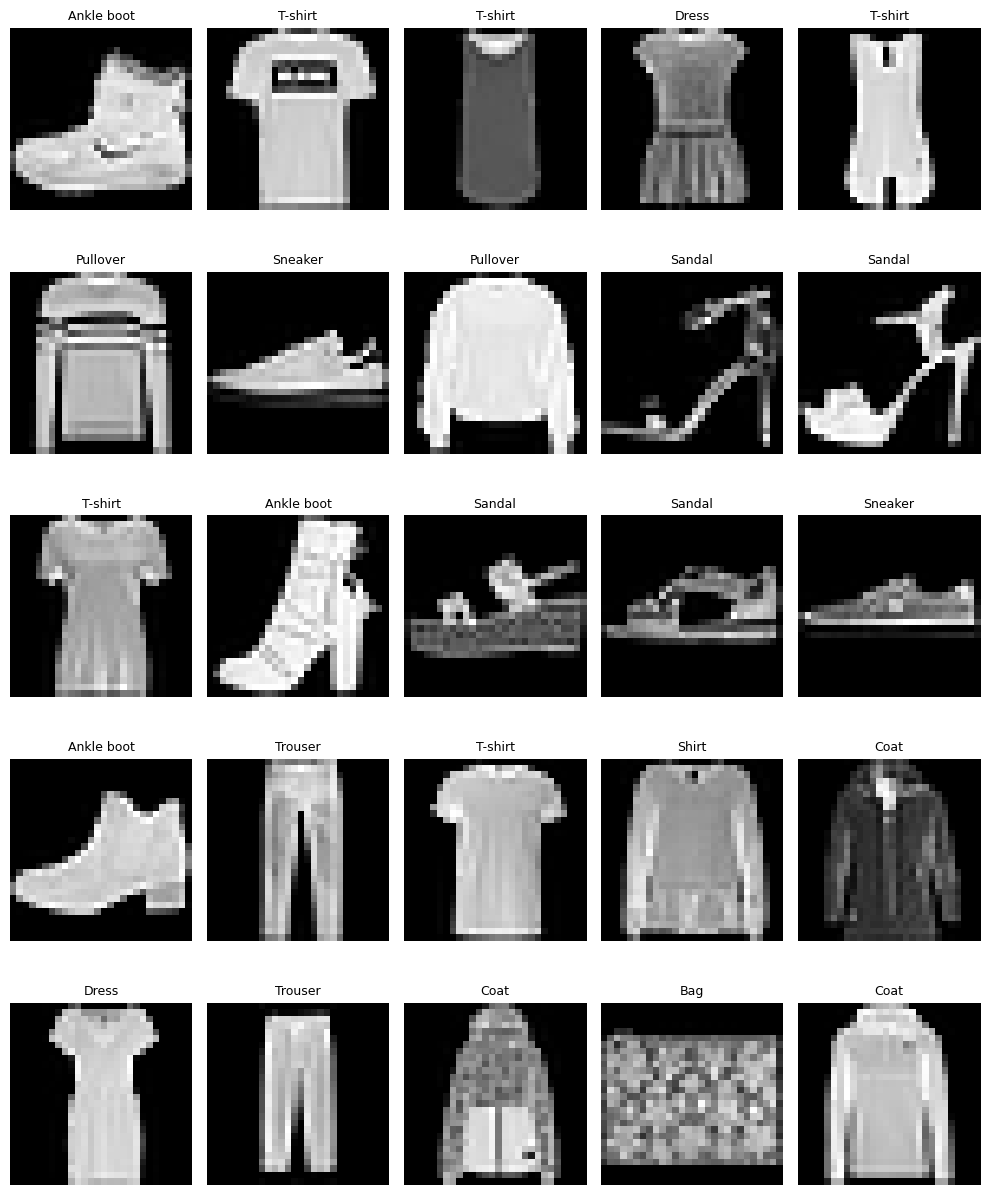

In [26]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [27]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [28]:
def create_model():
    initializer = tf.keras.initializers.HeNormal()
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))

    # Add 10 hidden layers
    for _ in range(10):
        model.add(layers.Dense(128, kernel_initializer=initializer))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(0.2))

    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    return model


In [29]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 255,498 (998.04 KB)

 Trainable params: 252,938 (988.04 KB)

 Non-trainable params: 2,560 (10.00 KB)

In [31]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
]

# Use this inside .fit(...)
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/30
375/375 - 17s - 46ms/step - accuracy: 0.4982 - loss: 1.3339 - val_accuracy: 0.7622 - val_loss: 0.6478 - learning_rate: 1.0000e-03
Epoch 2/30
375/375 - 6s - 16ms/step - accuracy: 0.7466 - loss: 0.7217 - val_accuracy: 0.8237 - val_loss: 0.5161 - learning_rate: 1.0000e-03
Epoch 3/30
375/375 - 11s - 29ms/step - accuracy: 0.7982 - loss: 0.6030 - val_accuracy: 0.8407 - val_loss: 0.4695 - learning_rate: 1.0000e-03
Epoch 4/30
375/375 - 7s - 18ms/step - accuracy: 0.8208 - loss: 0.5483 - val_accuracy: 0.8326 - val_loss: 0.4921 - learning_rate: 1.0000e-03
Epoch 5/30
375/375 - 6s - 16ms/step - accuracy: 0.8307 - loss: 0.5149 - val_accuracy: 0.8234 - val_loss: 0.5013 - learning_rate: 1.0000e-03
Epoch 6/30
375/375 - 11s - 30ms/step - accuracy: 0.8414 - loss: 0.4838 - val_accuracy: 0.8526 - val_loss: 0.4225 - learning_rate: 1.0000e-03
Epoch 7/30
375/375 - 6s - 17ms/step - accuracy: 0.8478 - loss: 0.4597 - val_accuracy: 0.8651 - val_loss: 0.3917 - learning_rate: 1.0000e-03
Epoch 8/30
375/37

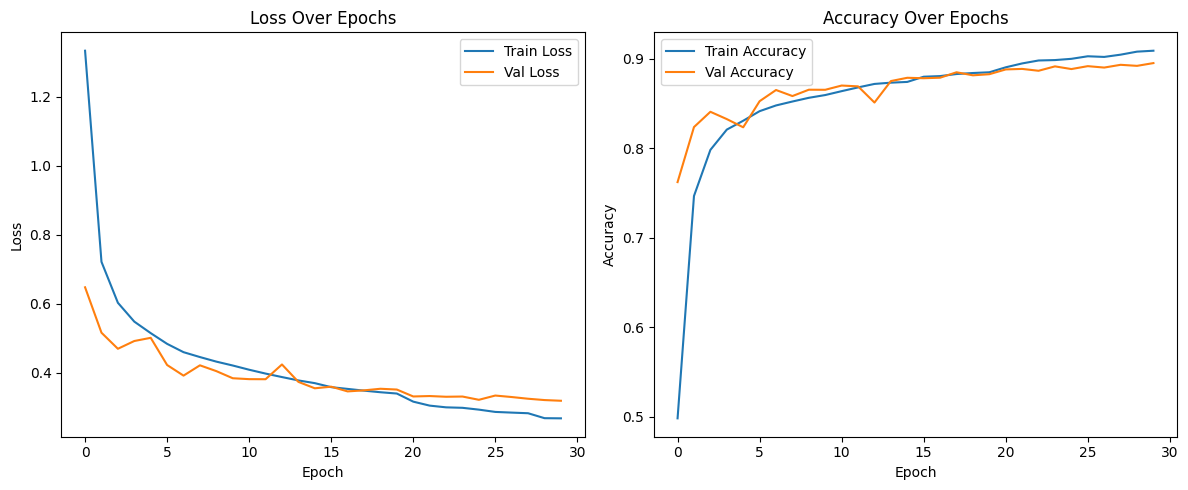

In [32]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [33]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8887


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


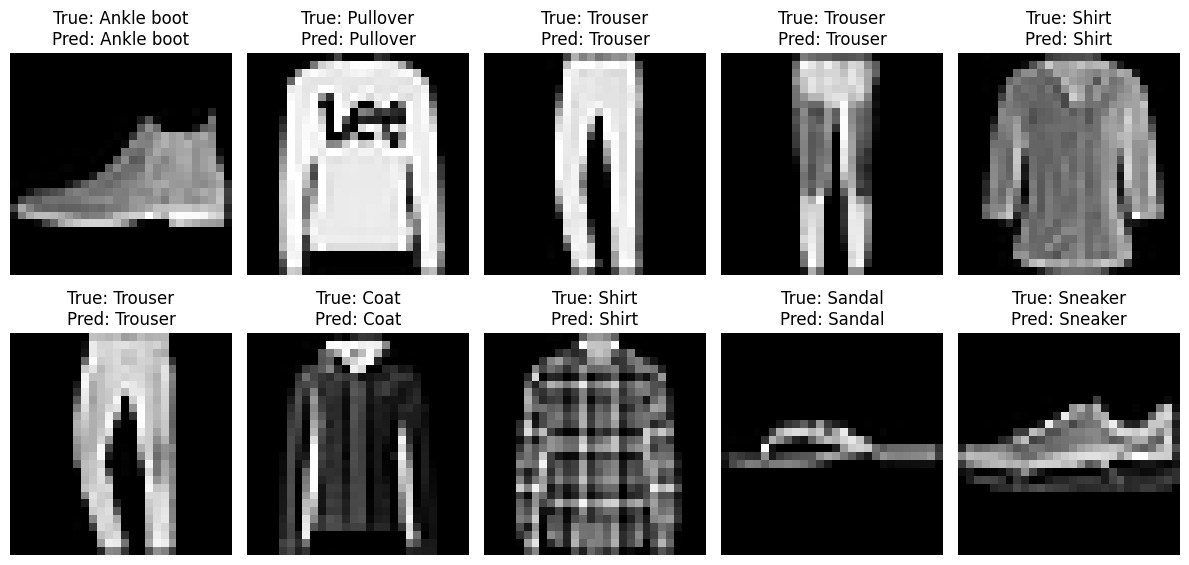

In [34]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

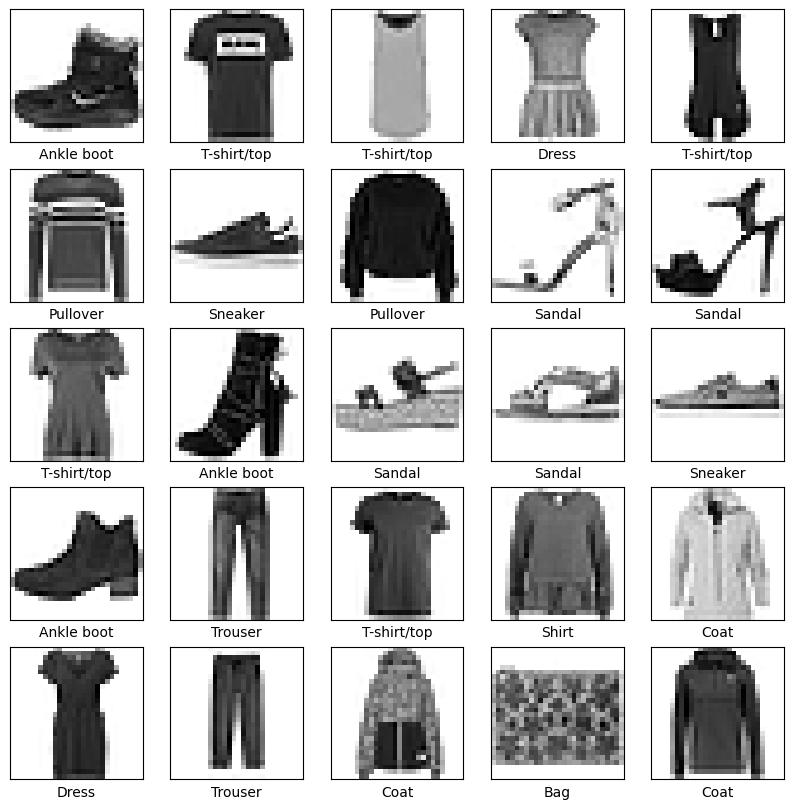

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [36]:
# Standard DNN Model
def create_dnn():
    inputs = Input(shape=(784,))
    x = inputs
    for _ in range(10):  # Add 10 hidden layers
        x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)



# ResNet-style DNN Model (with residual connections)
def create_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial dense layer
    x = Dense(256, activation='relu')(inputs)

    # Residual block 1
    x1 = Dense(256, activation='relu')(x)
    x2 = Dense(256, activation='relu')(x1)
    res1 = Add()([x, x2])  # Skip connection
    res1 = Activation('relu')(res1)

    # Residual block 2
    x3 = Dense(128, activation='relu')(res1)
    x4 = Dense(128, activation='relu')(x3)
    # Need to match dimensions for the skip connection
    res1_down = Dense(128, activation='relu')(res1)  # Projection to match dimensions
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)

    # Final layers
    x_final = Dense(64, activation='relu')(res2)
    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)

In [37]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Train models
dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                 epochs=10,
                                 batch_size=128,
                                 validation_split=0.2,
                                 verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7087 - loss: 0.8087 - val_accuracy: 0.8451 - val_loss: 0.4306
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8513 - loss: 0.4128 - val_accuracy: 0.8639 - val_loss: 0.3871
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8637 - loss: 0.3700 - val_accuracy: 0.8695 - val_loss: 0.3689
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8731 - loss: 0.3492 - val_accuracy: 0.8757 - val_loss: 0.3467
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8829 - loss: 0.3178 - val_accuracy: 0.8729 - val_loss: 0.3551
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8851 - loss: 0.3124 - val_accuracy: 0.8787 - val_loss: 0.3657
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8892 - loss: 0.2983 - val_accuracy: 0.8768 - val_loss: 0.3431
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8946 - loss: 0.2802 - val_accurac

In [39]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

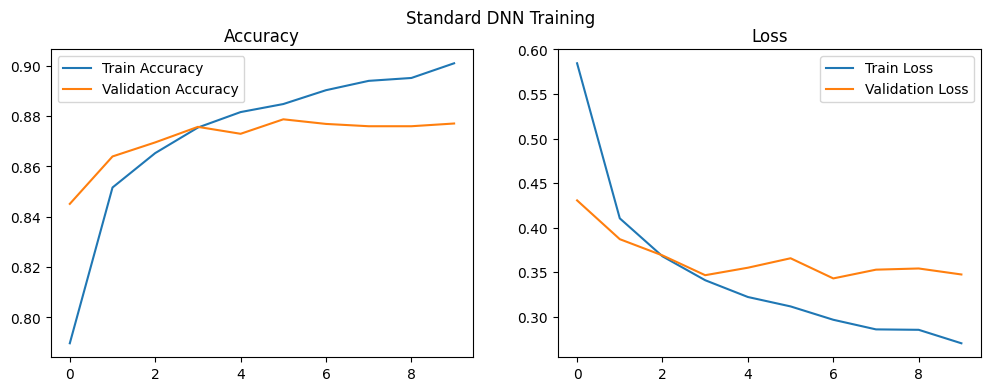

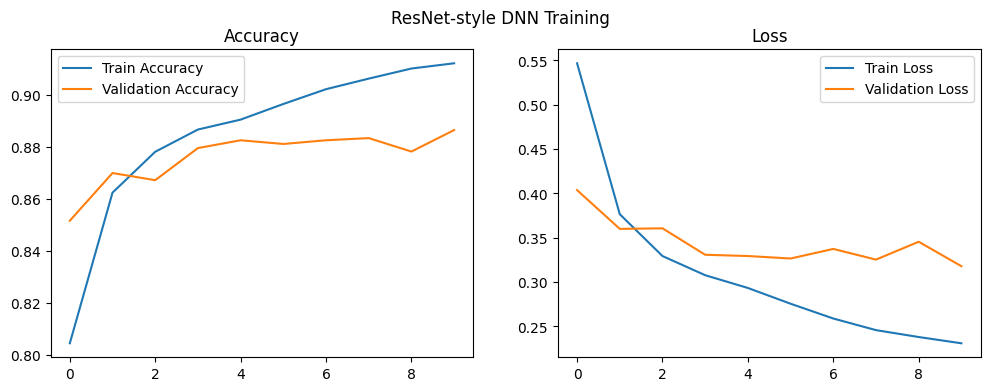

In [40]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [41]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [42]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8692
ResNet-style DNN Test Accuracy: 0.8796



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


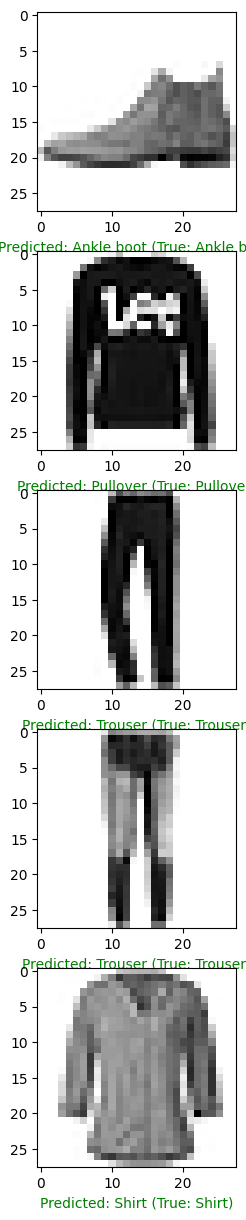


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


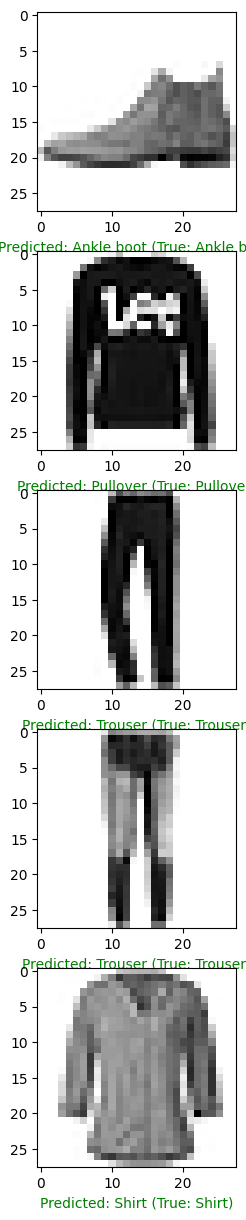

In [43]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)

##While executing the Fashion MNIST classification code:

The dataset is balanced but has visually similar classes (e.g., Shirt vs T-shirt).

The standard DNN achieves ~88–89% accuracy but may overfit.

The ResNet-style DNN with skip connections performs better (~90–92%) and generalizes well.

Batch normalization, dropout, and learning rate scheduling improve stability and accuracy.